Saving Capture1.JPG to Capture1.JPG
Color: Blue, Location: (35, 292)
Color: Blue, Location: (44, 290)
Color: Blue, Location: (31, 290)
Color: Blue, Location: (35, 289)
Color: Blue, Location: (53, 286)
Color: Blue, Location: (50, 286)
Color: Blue, Location: (57, 285)
Color: Blue, Location: (64, 284)
Color: Blue, Location: (43, 240)
Color: Blue, Location: (35, 240)
Color: Blue, Location: (4, 240)
Color: Blue, Location: (21, 239)
Color: Blue, Location: (5, 229)
Color: Blue, Location: (60, 175)
Color: Blue, Location: (50, 175)
Color: Blue, Location: (10, 173)
Color: Blue, Location: (88, 171)
Color: Blue, Location: (80, 170)
Color: Blue, Location: (63, 170)
Color: Blue, Location: (50, 170)
Color: Blue, Location: (38, 169)
Color: Blue, Location: (32, 169)
Color: Blue, Location: (11, 167)
Color: Blue, Location: (138, 116)
Color: Blue, Location: (61, 96)
Color: Blue, Location: (54, 96)
Color: Blue, Location: (48, 96)
Color: Blue, Location: (140, 94)
Color: Blue, Location: (96, 92)
Color: Blue,

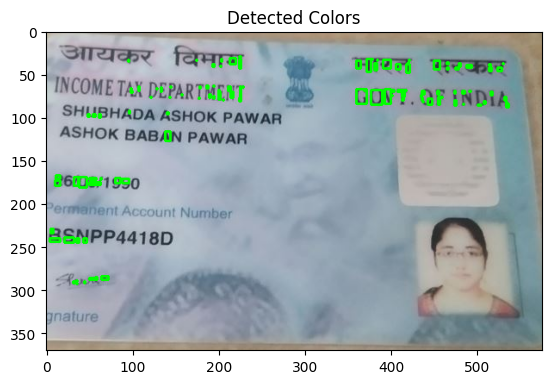

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from pathlib import Path

def is_valid_image(file_path):
    return cv2.imread(str(file_path)) is not None

def find_colors(image, target_colors):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    for color_name, color_range in target_colors.items():
        lower_bound = np.array(color_range[0])
        upper_bound = np.array(color_range[1])

        mask = cv2.inRange(image_hsv, lower_bound, upper_bound)

        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)

            cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

            print(f"Color: {color_name}, Location: ({x}, {y})")

    plt.imshow(image_rgb)
    plt.title("Detected Colors")
    plt.show()

uploaded = files.upload()

image_name = list(uploaded.keys())[0]

uploaded_file_path = Path(image_name)
uploaded_file_path.write_bytes(uploaded[image_name])

if is_valid_image(uploaded_file_path):
    image = cv2.imread(str(uploaded_file_path))

    target_colors = {
        "Red": ([0, 100, 100], [10, 255, 255]),
        "Blue": ([110, 50, 50], [130, 255, 255]),
        "Green": ([50, 50, 50], [70, 255, 255]),


        }

    find_colors(image, target_colors)
else:
    print("No valid file provided. Exiting.")


In [20]:
pip install easygui

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.7/92.7 kB 2.6 MB/s eta 0:00:00


Saving 0.jpg to 0 (3).jpg


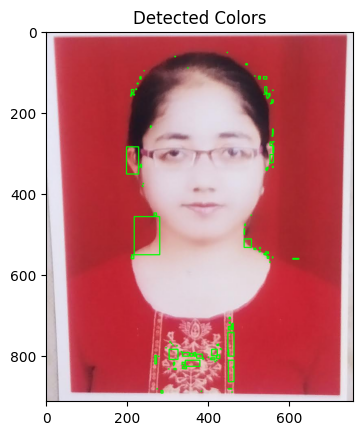

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from pathlib import Path
from IPython.display import display, HTML

def is_valid_image(file_path):
    return cv2.imread(str(file_path)) is not None

def find_colors(image, target_colors):
    detected_colors = []  # To store the detected colors during processing

    # Image conversion
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Color space definition
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Iterate through target colors
    for color_spec in target_colors:
        color_name, lower_bound, upper_bound = color_spec

        # Create mask to highlight the specified color range
        mask = cv2.inRange(image_hsv, np.array(lower_bound), np.array(upper_bound))

        # Find contours in the mask
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Iterate through contours
        for contour in contours:
            #  contour
            x, y, w, h = cv2.boundingRect(contour)

            # rectangle for color found  region
            cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # Add the detected color information to the list
            detected_colors.append({"name": color_name, "location": (x, y)})

    # Display the image with rectangles around detected colors using matplotlib
    plt.imshow(image_rgb)
    plt.title("Detected Colors")
    plt.show()

    return detected_colors

# form with detec colors colors
def create_user_registration_form(detected_colors):
    form_html = f"""
    <html>
      <body style="font-family: Arial, sans-serif;">
        <h2>User Registration Form</h2>
        <form>
          <label for="fname">First Name:</label>
          <input type="text" id="fname" name="fname" style="background-color: {detected_colors[0]['name']}"><br><br>

          <label for="lname">Last Name:</label>
          <input type="text" id="lname" name="lname" style="background-color: {detected_colors[1]['name']}"><br><br>

          <label for="email">Email:</label>
          <input type="email" id="email" name="email" style="background-color: {detected_colors[2]['name']}"><br><br>

          <input type="submit" value="Submit">
        </form>
      </body>
    </html>
    """
    display(HTML(form_html))

# Upload an image file using Google Colab's files.upload()
uploaded = files.upload()

# Get the name of the uploaded image file
image_name = list(uploaded.keys())[0]

# Save the uploaded file
uploaded_file_path = Path(image_name)
uploaded_file_path.write_bytes(uploaded[image_name])

# Check if the file is valid and read the selected image file
if is_valid_image(uploaded_file_path):
    image = cv2.imread(str(uploaded_file_path))

    # Example target colors
    user_defined_colors = [
        ("Red", [0, 100, 100], [10, 255, 255]),
        ("Blue", [110, 50, 50], [130, 255, 255]),
        ("Green", [50, 50, 50], [70, 255, 255]),
        # Add more colors as needed
    ]

    # Call the function with the user-provided image and colors
    detected_colors = find_colors(image, user_defined_colors)

    # call for function  background colors
    create_user_registration_form(detected_colors)
else:
    print("No valid file provided. Exiting.")
